# Download Dataset


In [4]:
# Download the KITTI dataset
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip

--2025-03-10 01:12:23--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 

3.5.136.174, 3.5.135.10, 52.219.169.197, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|3.5.136.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327699796 (313M) [application/zip]
Saving to: ‘data_semantics.zip’

data_semantics.zip  100%[===================>] 312.52M  16.2MB/s    in 16s     

2025-03-10 01:12:39 (19.4 MB/s) - ‘data_semantics.zip’ saved [327699796/327699796]



In [5]:
!unzip data_semantics.zip

Archive:  data_semantics.zip
   creating: testing/
   creating: testing/image_2/
  inflating: testing/image_2/000000_10.png  
  inflating: testing/image_2/000001_10.png  
  inflating: testing/image_2/000002_10.png  
  inflating: testing/image_2/000003_10.png  
  inflating: testing/image_2/000004_10.png  
  inflating: testing/image_2/000005_10.png  
  inflating: testing/image_2/000006_10.png  
  inflating: testing/image_2/000007_10.png  
  inflating: testing/image_2/000008_10.png  
  inflating: testing/image_2/000009_10.png  
  inflating: testing/image_2/000010_10.png  
  inflating: testing/image_2/000011_10.png  
  inflating: testing/image_2/000012_10.png  
  inflating: testing/image_2/000013_10.png  
  inflating: testing/image_2/000014_10.png  
  inflating: testing/image_2/000015_10.png  
  inflating: testing/image_2/000016_10.png  
  inflating: testing/image_2/000017_10.png  
  inflating: testing/image_2/000018_10.png  
  inflating: testing/image_2/000019_10.png  
  inflating: testin


  inflating: testing/image_2/000024_10.png  
  inflating: testing/image_2/000025_10.png  
  inflating: testing/image_2/000026_10.png  
  inflating: testing/image_2/000027_10.png  
  inflating: testing/image_2/000028_10.png  
  inflating: testing/image_2/000029_10.png  
  inflating: testing/image_2/000030_10.png  
  inflating: testing/image_2/000031_10.png  
  inflating: testing/image_2/000032_10.png  
  inflating: testing/image_2/000033_10.png  
  inflating: testing/image_2/000034_10.png  
  inflating: testing/image_2/000035_10.png  
  inflating: testing/image_2/000036_10.png  
  inflating: testing/image_2/000037_10.png  
  inflating: testing/image_2/000038_10.png  
  inflating: testing/image_2/000039_10.png  
  inflating: testing/image_2/000040_10.png  
  inflating: testing/image_2/000041_10.png  
  inflating: testing/image_2/000042_10.png  
  inflating: testing/image_2/000043_10.png  
  inflating: testing/image_2/000044_10.png  
  inflating: testing/image_2/000045_10.png  
  inflati

# Import Libraries

In [ ]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 30.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import segmentation
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import logging
import time
import pandas as pd

# Preprocess masks

In [2]:
# Define a dictionary mapping RGB colors to class labels
# The key is the (R, G, B) tuple, and the value is the corresponding class label
color_map = {
    (128, 64, 128): 1,    # Road
    (244,35,232): 2,      # Sidewalk
    (70, 70, 70): 3,      # Building
    (102,102,156): 4,     # Wall
    (190, 153, 153): 5,   # Fence
    (107, 142, 35): 6,    # Vegetation
    (152,251,125): 7,     # Terrain
    (70, 130, 180): 8,    # Sky
    (220, 20, 60): 9,     # Person
    (0, 0, 142): 10,      # Car
    (119, 11, 32): 11,    # Bicycle
    (0, 0, 230): 12,      # Motorcycle
    (0,0,0): 0,           # Background (can be 0)
}


In [3]:
# Create a lookup table for the color_map
lookup_table = np.zeros((256, 256, 256), dtype=np.uint8)

for (r, g, b), label in color_map.items():
    lookup_table[r, g, b] = label

In [18]:
# Path to the folder with RGB masks
mask_folder = 'dummy_kitti_dataset/train_masks'
output_mask_folder = 'dummy_kitti_dataset/train_preprocessed_masks'

n = 0
total = len(os.listdir(mask_folder))


start_time = time.time()

# Loop through all mask images
for mask_filename in os.listdir(mask_folder):
    if mask_filename.endswith(".png"):
        mask_path = os.path.join(mask_folder, mask_filename)
        mask_image = cv2.imread(mask_path)
        mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

        integer_mask = lookup_table[mask_image[...,0], mask_image[...,1], mask_image[...,2]]
        
        output_mask_path = os.path.join(output_mask_folder, mask_filename)
        cv2.imwrite(output_mask_path, integer_mask)
        n+=1
        print(str(n) +'/'+ str(total))

end_time = time.time()
preprocessing_time = end_time - start_time
print(preprocessing_time)

1/11
2/11
3/11
4/11
5/11
6/11
7/11
8/11
9/11
10/11
11/11
0.32938170433044434


# KITTI dataset class

In [4]:
class KITTIdataset(Dataset):
    def __init__(self,image_dir, mask_dir, transform=None, mask_transform=None, image_size=(256, 256)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.mask_transform = mask_transform
        self.image_size = image_size

        self.image_names = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        self.mask_names = sorted([f for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

        assert len(self.image_names) == len(self.mask_names), "Mismatch between image and mask count!"

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

        image = Image.open(img_path)
        mask = Image.open(mask_path)

        if self.image_size:
            image = image.resize(self.image_size)
            mask = mask.resize(self.image_size)

        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        return image, mask

# Model class


In [5]:
class DeepLabV3Plus(nn.Module):
    def __init__(self, num_classes):
        super(DeepLabV3Plus, self).__init__()
        self.model = segmentation.deeplabv3_resnet101(weights='DEFAULT')
        self.model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=(1, 1), stride=(1, 1))

    def forward(self, x):
        return self.model(x)['out']

In [92]:
class ToTensorWithoutNormalization:
    def __call__(self, sample):
        mask = np.array(sample)
        mask_tensor = torch.tensor(mask, dtype=torch.long)
        return mask_tensor

# Define instances and variables

In [95]:
image_dir = 'dummy_kitti_dataset/train_images'
mask_dir = 'dummy_kitti_dataset/train_preprocessed_masks'
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 5
BATCH_SIZE = 2
NUM_CLASSES = 13
LEARNING_RATE = 1e-3
IMAGE_SIZE = (256, 256)
CHECKPOINT_DIR = "experiments"
EXPERIMENT_NAME = '5epochs_local_training'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

mask_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    ToTensorWithoutNormalization()
])

dataset = KITTIdataset(image_dir=image_dir, mask_dir=mask_dir,
                       transform=transform, mask_transform=mask_transform)

num_img = len(dataset)
train_size = int(0.6*num_img)
val_size = int(0.2*num_img)
test_size = num_img - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

model = DeepLabV3Plus(NUM_CLASSES).to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

log_dir = "logs"  # Directory where the logs will be stored
experiment_log_dir = os.path.join(log_dir, EXPERIMENT_NAME)
os.makedirs(experiment_log_dir, exist_ok=True)

log_file = os.path.join(experiment_log_dir, f"{EXPERIMENT_NAME}.log")

logging.basicConfig(
    level=logging.INFO,  # Log level, can be DEBUG, INFO, WARNING, ERROR, CRITICAL
    format="%(asctime)s - %(levelname)s - %(message)s",  # Log message format
    handlers=[
        logging.FileHandler(log_file),  # Save logs to the file
        logging.StreamHandler()  # Print logs to the console
    ]
)

# Define Train Function

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, device, epochs):
    train_losses = []
    val_losses = []

    plt.ion()
    fig, ax = plt.subplots()

    logging.info("Starting training...")

    epoch_progress = tqdm(range(epochs), desc="Training Progress")  

    for epoch in epoch_progress:
        print(f"\n Epoch {epoch + 1}/{epochs}")
        logging.info(f"Epoch {epoch + 1}/{epochs}")

        # Train Phase
        model.train()
        running_train_loss = 0.0
        for images, masks in train_loader:
            images, masks = images.to(device),  masks.squeeze(1).long().to(device)

            optimizer.zero_grad()
            preds = model(images)
            loss = criterion(preds, masks)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f"Train Loss: {avg_train_loss:.4f}")
        logging.info(f"Train Loss: {avg_train_loss:.4f}")

        # Validation Phase
        model.eval()
        running_val_loss = 0.0

        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device),  masks.squeeze(1).long().to(device)

                preds = model(images)
                loss = criterion(preds, masks)
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Val Loss: {avg_val_loss:.4f}")
        logging.info(f"Val Loss: {avg_val_loss:.4f}")

        # Update tqdm progress bar
        epoch_progress.set_postfix({"Train Loss": f"{avg_train_loss:.4f}", "Val Loss": f"{avg_val_loss:.4f}"})

        # Update plot
        ax.clear()
        ax.plot(train_losses, label="Train Loss")
        ax.plot(val_losses, label="Val Loss")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()
        plt.draw()
        plt.pause(0.1)

        # Learning rate scheduling
        scheduler.step()

    # Save model at the end of training
    checkpoint_path = os.path.join(CHECKPOINT_DIR, EXPERIMENT_NAME )
    torch.save(model.state_dict(), checkpoint_path)
    print("Final model checkpoint saved!")
    logging.info(f"Final model checkpoint saved at {checkpoint_path}")

    # Save the losses to a CSV file
    loss_df = pd.DataFrame({
        'Epoch': range(1, epochs+1),
        'Training Loss': train_losses,
        'Validation Loss': val_losses
    })

    loss_df.to_csv(EXPERIMENT_NAME, index = 'False')

    print("Training Completed!")
    logging.info("Training Completed!")
    plt.ioff()
    plt.show()

# Train the Model

2025-03-11 22:50:28,890 - INFO - Starting training...
Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]2025-03-11 22:50:28,908 - INFO - Epoch 1/5
c:\Users\dhoow\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(



 Epoch 1/5


2025-03-11 22:50:59,381 - INFO - Train Loss: 2.3781


Train Loss: 2.3781


2025-03-11 22:51:03,233 - INFO - Val Loss: 2.8473
Training Progress:   0%|          | 0/5 [00:34<?, ?it/s, Train Loss=2.3781, Val Loss=2.8473]

Val Loss: 2.8473


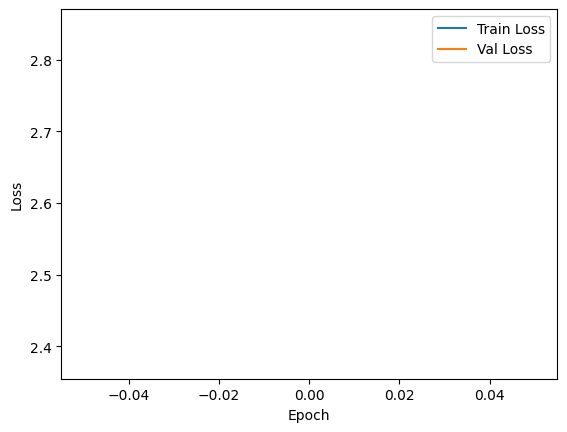

Training Progress:  20%|██        | 1/5 [00:35<02:19, 35.00s/it, Train Loss=2.3781, Val Loss=2.8473]2025-03-11 22:51:03,912 - INFO - Epoch 2/5



 Epoch 2/5


2025-03-11 22:51:42,114 - INFO - Train Loss: 1.9560


Train Loss: 1.9560


2025-03-11 22:51:45,261 - INFO - Val Loss: 9.9868
Training Progress:  20%|██        | 1/5 [01:16<02:19, 35.00s/it, Train Loss=1.9560, Val Loss=9.9868]

Val Loss: 9.9868


<Figure size 640x480 with 0 Axes>

Training Progress:  40%|████      | 2/5 [01:16<01:56, 38.85s/it, Train Loss=1.9560, Val Loss=9.9868]2025-03-11 22:51:45,460 - INFO - Epoch 3/5



 Epoch 3/5


2025-03-11 22:52:18,151 - INFO - Train Loss: 1.5356


Train Loss: 1.5356


2025-03-11 22:52:20,970 - INFO - Val Loss: 2.9786
Training Progress:  40%|████      | 2/5 [01:52<01:56, 38.85s/it, Train Loss=1.5356, Val Loss=2.9786]

Val Loss: 2.9786


<Figure size 640x480 with 0 Axes>

Training Progress:  60%|██████    | 3/5 [01:52<01:14, 37.41s/it, Train Loss=1.5356, Val Loss=2.9786]2025-03-11 22:52:21,154 - INFO - Epoch 4/5



 Epoch 4/5


2025-03-11 22:52:52,330 - INFO - Train Loss: 1.2030


Train Loss: 1.2030


2025-03-11 22:52:56,668 - INFO - Val Loss: 0.0601
Training Progress:  60%|██████    | 3/5 [02:27<01:14, 37.41s/it, Train Loss=1.2030, Val Loss=0.0601]

Val Loss: 0.0601


<Figure size 640x480 with 0 Axes>

Training Progress:  80%|████████  | 4/5 [02:27<00:36, 36.73s/it, Train Loss=1.2030, Val Loss=0.0601]2025-03-11 22:52:56,850 - INFO - Epoch 5/5



 Epoch 5/5


2025-03-11 22:53:32,754 - INFO - Train Loss: 0.9116


Train Loss: 0.9116


2025-03-11 22:53:36,313 - INFO - Val Loss: 0.0472
Training Progress:  80%|████████  | 4/5 [03:07<00:36, 36.73s/it, Train Loss=0.9116, Val Loss=0.0472]

Val Loss: 0.0472


<Figure size 640x480 with 0 Axes>

Training Progress: 100%|██████████| 5/5 [03:07<00:00, 37.52s/it, Train Loss=0.9116, Val Loss=0.0472]
2025-03-11 22:53:37,294 - INFO - Final model checkpoint saved at experiments\5epochs_local_training


Final model checkpoint saved!


2025-03-11 22:53:37,515 - INFO - Training Completed!


Training Completed!


In [40]:
train(model, train_loader, val_loader, criterion, optimizer, scheduler, DEVICE, EPOCHS)

# Evaluation

## Load trained model

In [8]:
MODEL_PATH = os.path.join(CHECKPOINT_DIR, EXPERIMENT_NAME)
model.load_state_dict(torch.load(MODEL_PATH, map_location = DEVICE))
model.eval()

DeepLabV3Plus(
  (model): DeepLabV3(
    (backbone): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

## Make a prediction for test set & visualize predicted mask

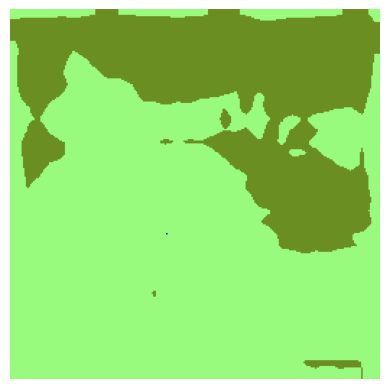

In [ ]:
# Make a prediction and visualize

data_iter = iter(test_loader)
image, true_mask = next(data_iter)

single_image = image[0].unsqueeze(0)
single_image = single_image.to(DEVICE)
model.to(DEVICE)
model.eval()  
with torch.no_grad(): 
    output = model(single_image) 
predicted_mask = torch.argmax(output, dim=1)  # Shape: [1, 256, 256]
predicted_mask = predicted_mask.squeeze(0)  # Shape: [256, 256]

# The following steps can be done with the function convert_mask_to_rgb below
predicted_mask_np = predicted_mask.cpu().numpy()
height, width = predicted_mask_np.shape
predicted_rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)
for color,idx in color_map.items():
        predicted_rgb_mask[predicted_mask_np == idx] = color
plt.imshow(predicted_rgb_mask)
plt.axis("off")
plt.show()

## Convert true mask from test loader back to rgb

In [61]:
def convert_mask_to_rgb(mask, color_map):
    """
    Converts a 2D segmentation mask (class indices) to an RGB mask.
    
    Args:
        mask (torch.Tensor or np.ndarray): 2D mask with class indices.
        color_map (dict): Mapping from class indices to RGB values.

    Returns:
        np.ndarray: RGB mask (H, W, 3).
    """
    if isinstance(mask, torch.Tensor):
        mask = mask.cpu().numpy()  # Convert tensor to NumPy

    height, width = mask.shape
    rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

    for class_rgb, class_idx in color_map.items():
        rgb_mask[mask == class_idx] = class_rgb  # Assign RGB color

    return rgb_mask

## Define IoU function

In [ ]:
def compute_iou(pred_mask_array , true_mask_array, class_id):

    """
    Computes the Intersection over Union (IoU) for a specific class between 
    the predicted and true segmentation masks.

    Parameters:
        pred_mask_array (numpy.ndarray): The predicted mask 3D array (H, W, 3) 
        true_mask_array (numpy.ndarray): The ground truth mask image 3D array (H, W, 3) 
        class_id (int): The class ID for which to calculate the IoU.
                                 

    Returns:
        float: The Intersection over Union (IoU) score for the specified class.
               If there is no overlap (union is zero), returns 0."""

    assert pred_mask_array.shape == true_mask_array.shape, "Mask shapes should be the same"
    assert class_id in color_map.values(), "class_ID should be defined in color to class mapping"

    class_rgb = np.array(list(key for key, value in color_map.items() if value == class_id)[0])

    # Reshape the arrays into 2D arrays with 3 columns (RGB)
    reshaped_pred_mask_array = pred_mask_array.reshape(-1, 3)
    reshaped_true_mask_array = true_mask_array.reshape(-1, 3)

    # Create binary masks (1 for the target class, 0 for others)
    pred_lane = np.array([1 if np.all(pix == class_rgb) else 0 for pix in reshaped_pred_mask_array])
    true_lane = np.array([1 if np.all(pix == class_rgb) else 0 for pix in reshaped_true_mask_array])

    # Compute intersection and union
    intersection = np.logical_and(pred_lane, true_lane).sum()
    union = np.logical_or(pred_lane, true_lane).sum()

    # Compute IoU 
    iou = intersection / union if union > 0 else 0
    return iou

## Function to compute IOU

In [105]:
def compute_mean_iou(model, test_loader, color_map, device, class_id):
    """
    Computes the mean IoU across all images in the test dataset.

    Args:
        model (torch.nn.Module): Trained segmentation model.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
        color_map (dict): Mapping from class indices to RGB values.
        device (torch.device): Device (CPU/GPU).

    Returns:
        dict: IoU scores for each class.
    """
    model.eval()  
    all_iou = [] 

    with torch.no_grad():  
        for images, true_masks in test_loader:
            images = images.to(device)  
            true_masks = true_masks.to(device)  

            # FGet predictions from model
            outputs = model(images)  # (B, num_classes, H, W)
            predicted_masks = torch.argmax(outputs, dim=1)  #  (B, H, W)

            for i in range(images.shape[0]):  
                # Convert predicted & true masks to RGB
                true_mask_rgb = convert_mask_to_rgb(true_masks[i].squeeze(0), color_map)
                pred_mask_rgb = convert_mask_to_rgb(predicted_masks[i], color_map)
     
                iou = compute_iou(pred_mask_rgb, true_mask_rgb, class_id)
                all_iou.append(iou)

    # Compute final mean IoU per class
    mean_iou_scores = sum(all_iou)/len(all_iou)

    return mean_iou_scores


In [106]:
iou_scores = compute_mean_iou(model, test_loader, color_map, DEVICE,1)

c:\Users\dhoow\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
C:\Users\dhoow\AppData\Local\Temp\ipykernel_23940\2014467076.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  rgb_mask[mask == class_idx] = rgb  # Assign RGB color


In [107]:
print(iou_scores)

0.0
